# Image Classification: Who Are You and Are You Wearing Glasses?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

from keras.models import Model
from keras.layers import Dense, Activation, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Dropout
from keras.utils import np_utils
import keras.backend as K

from sklearn.model_selection import KFold
from sklearn.datasets import fetch_olivetti_faces

Using Theano backend.


In [2]:
%matplotlib inline

### Loading the Data

The data I'm using is the Olvetti Faces data set by AT&T. More information and the data itself are available from <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html">scikit learn</a>. 

Briefly, this data set contains a total of 400 images of 40 different people; 10 photos of each person at various angles with different lighting and facial expressions. 

In [3]:
data = fetch_olivetti_faces()

In [4]:
data.data.shape

(400, 4096)

In [5]:
labels = data.target
len(np.unique(labels))

40

In [6]:
data.images.shape

(400, 64, 64)

In [7]:
num_images = data.images.shape[0]        # number of images = 400
image_shape = data.images.shape[1:]      # each image dimension = 64 x 64

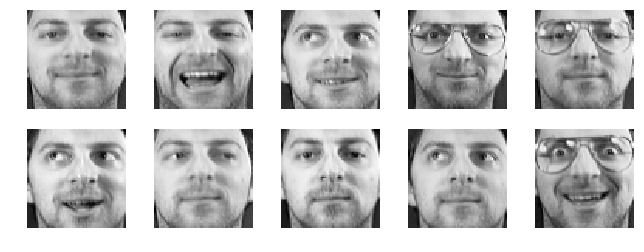

In [8]:
plt.figure(figsize=(11, 4))              # overall figure size

for i in range(60, 70):                  # this guy has the best expressions!
    sub = plt.subplot(2, 5, i-59)        
    # arrangment of the subplots (rows, columns, index [1, -)])
    
    sub.axis("off")
    sub.imshow(data.images[i], cmap='gray');

Notice this is the same guy in every picture. But in 3 of his pictures he is wearing glasses! The goal of this notebook is to build a multi-task CNN that will both recognize him and whether he's wearing glasses or not.

But first we need to figure out which pics have glasses and which don't...

### Who's Got Glasses?

To labels who's got glasses and who doesn't I loop through all the images and mark the appropriate label to my list.

In [34]:
glasses = []
plt.ion()                                  # turns on interactive mode making plt.show non-blocking.

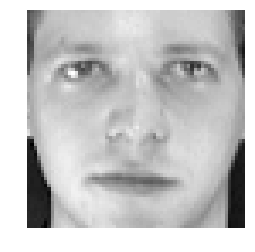

glasses: 0


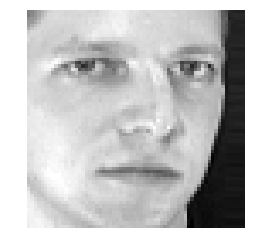

glasses: 0


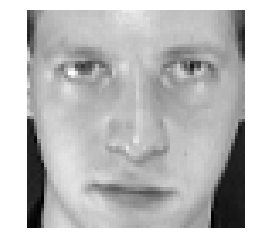

glasses: 0


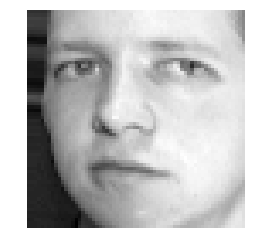

glasses: 0


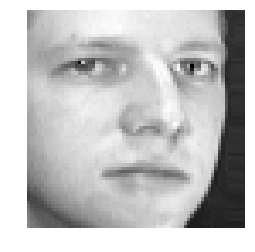

glasses: 0


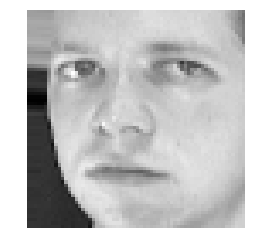

glasses: 0


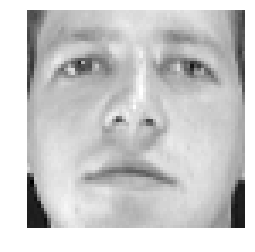

glasses: 0


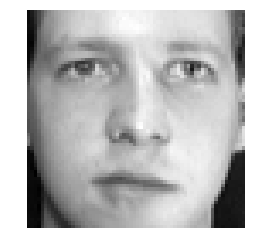

glasses: 0


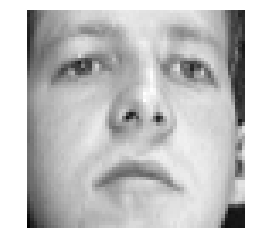

glasses: 0


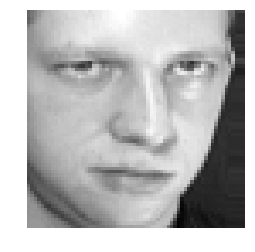

glasses: 0


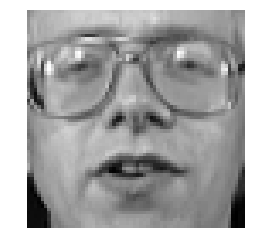

glasses: 1


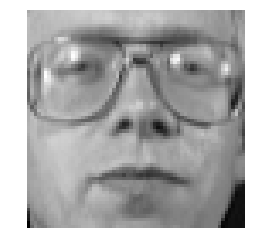

glasses: 1


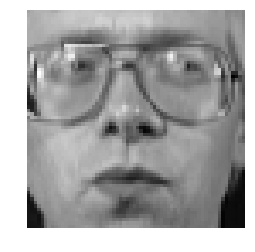

glasses: 1


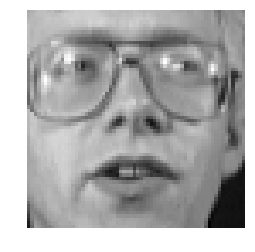

glasses: 1


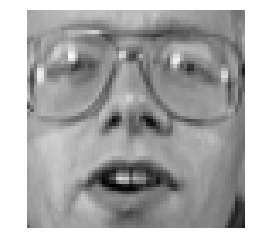

glasses: 1


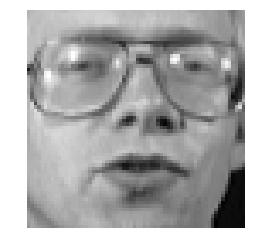

glasses: 1


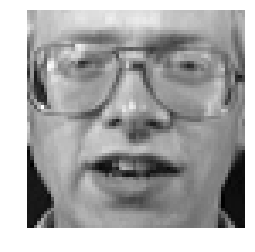

glasses: 1


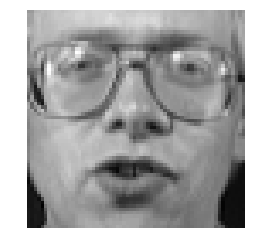

glasses: 1


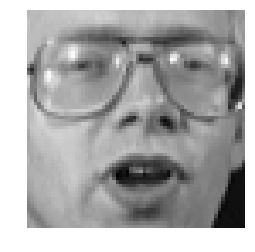

glasses: 1


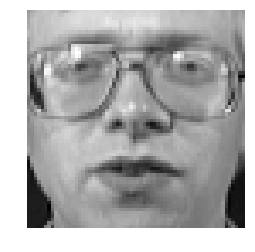

glasses: 1


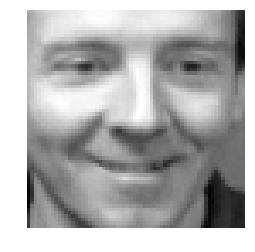

glasses: 0


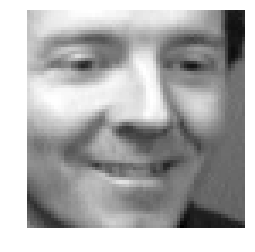

glasses: 0


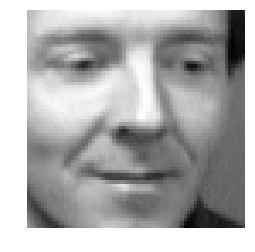

glasses: 0


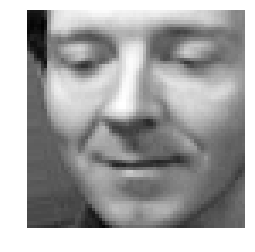

glasses: 0


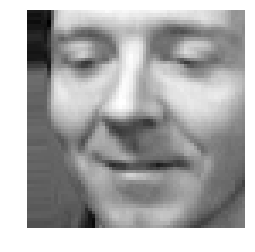

glasses: 0


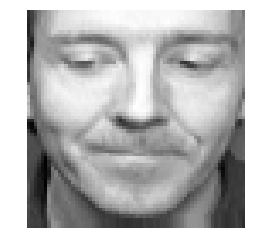

glasses: 0


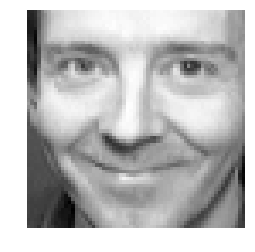

glasses: 0


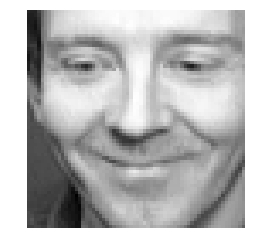

glasses: 0


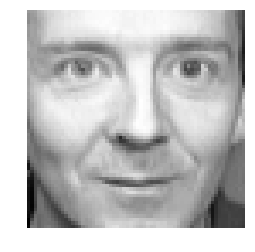

glasses: 0


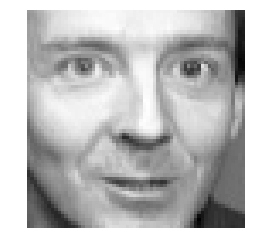

glasses: 0


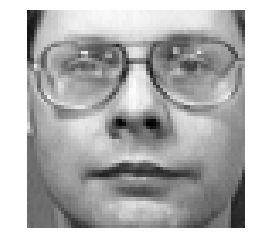

glasses: 1


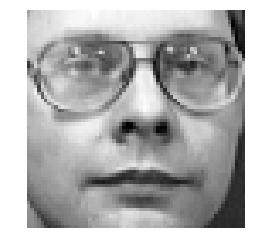

glasses: 1


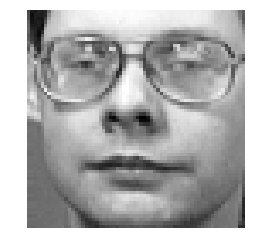

glasses: 1


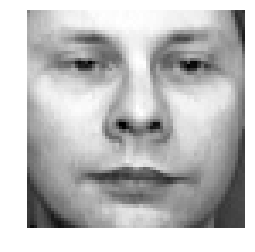

glasses: 0


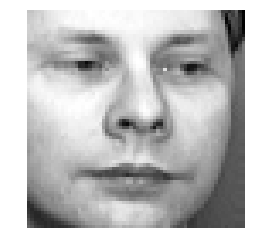

glasses: 0


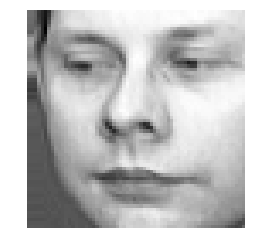

glasses: 0


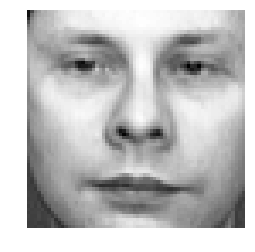

glasses: 0


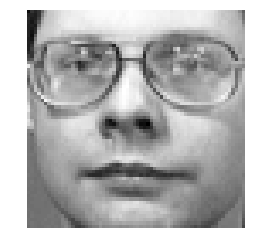

glasses: 1


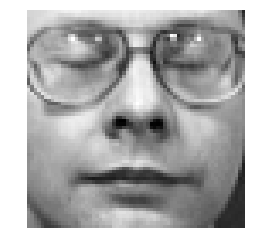

glasses: 1


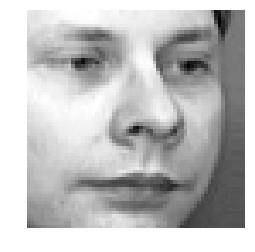

glasses: 0


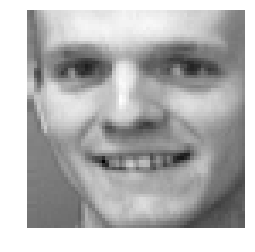

glasses: 0


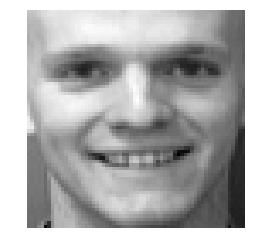

glasses: 0


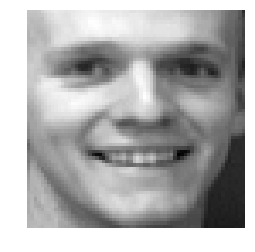

glasses: 0


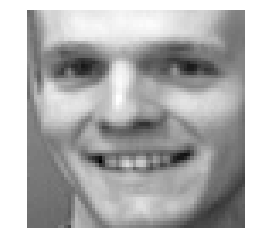

glasses: 0


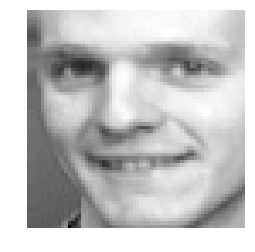

glasses: 0


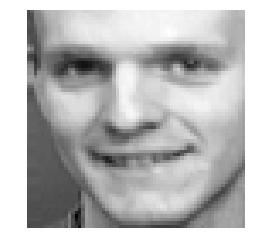

glasses: 0


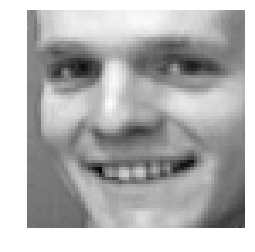

glasses: 0


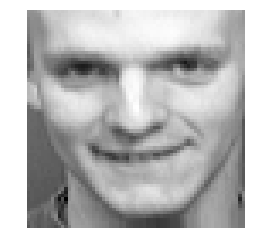

glasses: 0


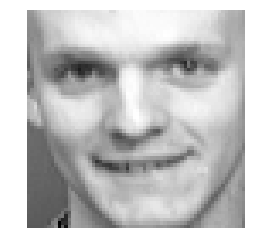

glasses: 0


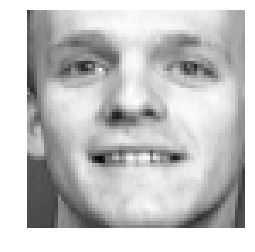

glasses: 0


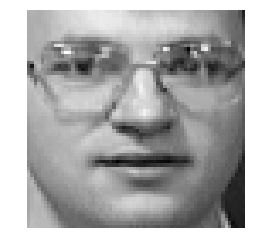

glasses: 1


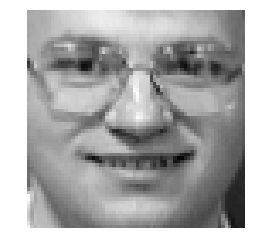

glasses: 1


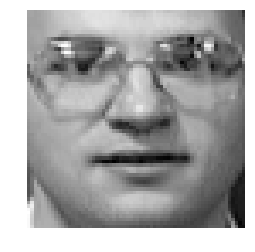

glasses: 1


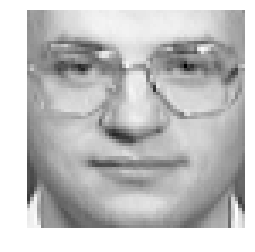

glasses: 1


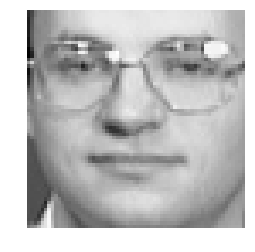

glasses: 1


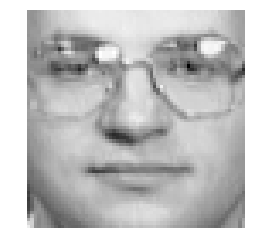

glasses: 1


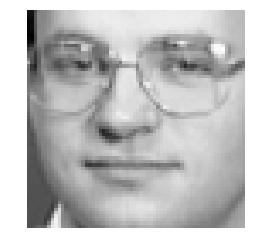

glasses: 1


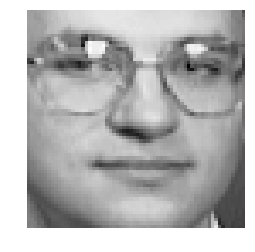

glasses: 1


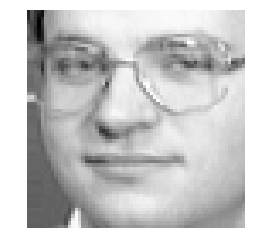

glasses: 1


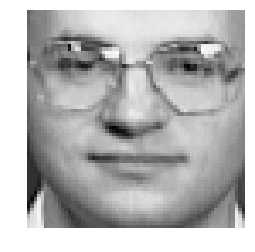

glasses: 1


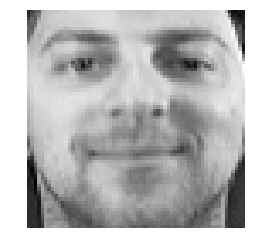

glasses: 0


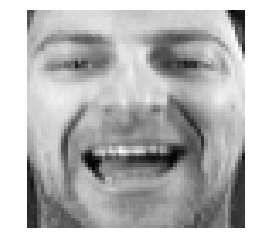

glasses: 0


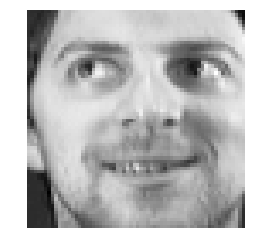

glasses: 0


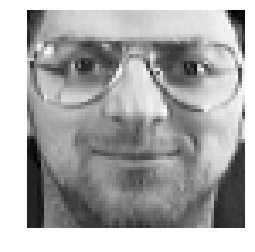

glasses: 1


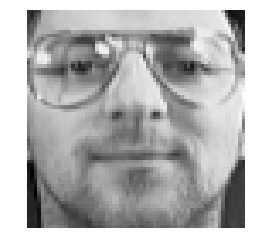

glasses: 1


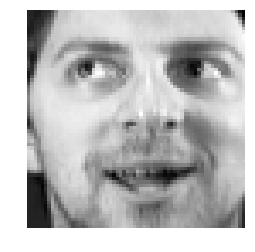

glasses: 0


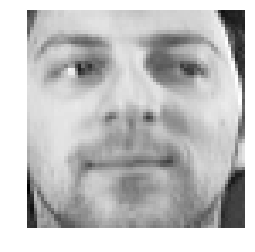

glasses: 0


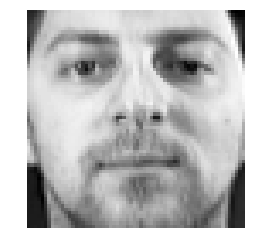

glasses: 0


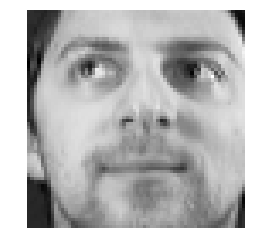

glasses: 0


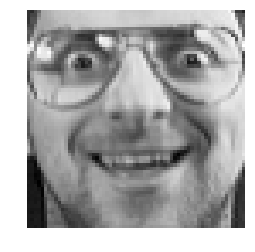

glasses: 1


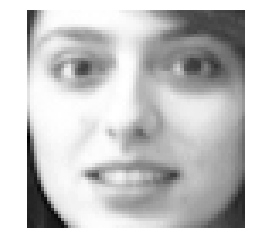

glasses: 0


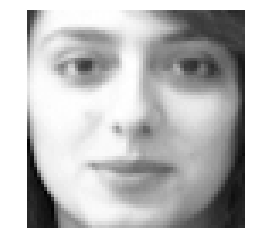

glasses: 0


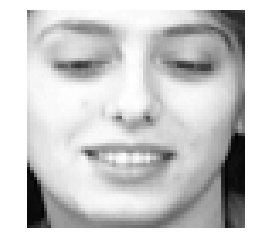

glasses: 0


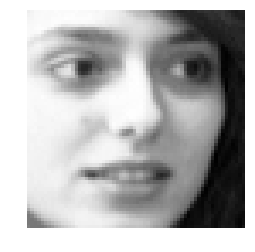

glasses: 0


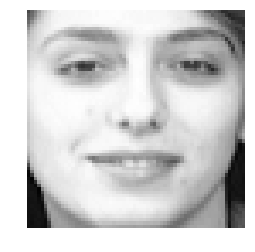

glasses: 0


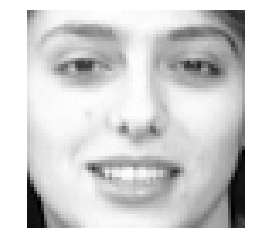

glasses: 0


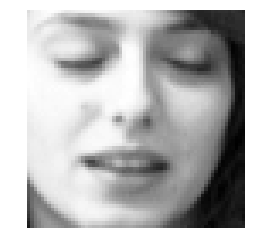

glasses: 0


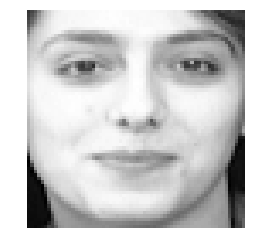

glasses: 0


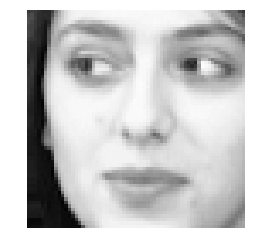

glasses: 0


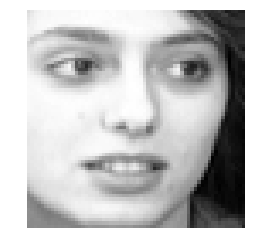

glasses: 0


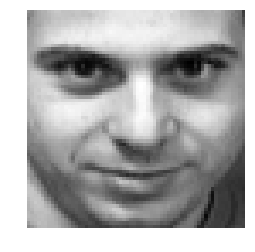

glasses: 0


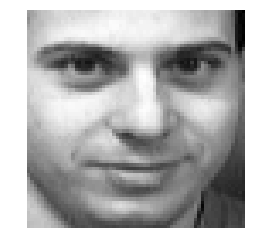

glasses: 0


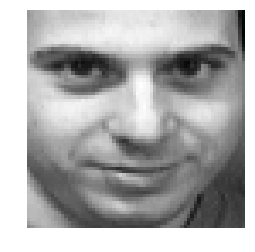

glasses: 0


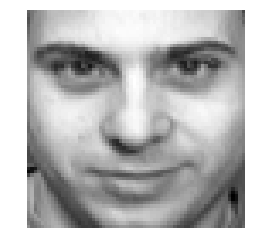

glasses: 0


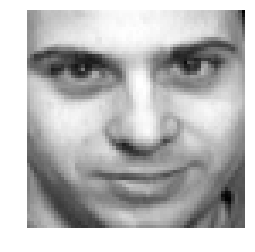

glasses: 0


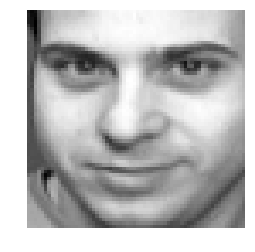

glasses: 0


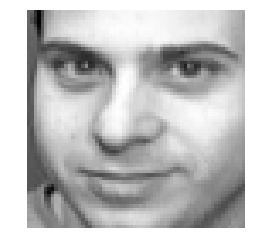

glasses: 0


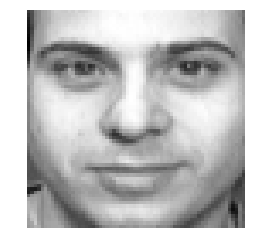

glasses: 0


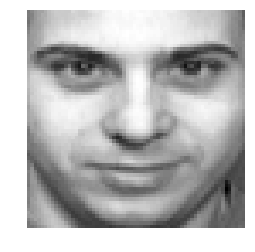

glasses: 0


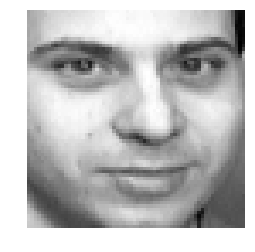

glasses: 0


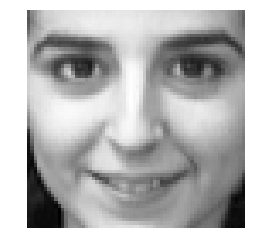

glasses: 0


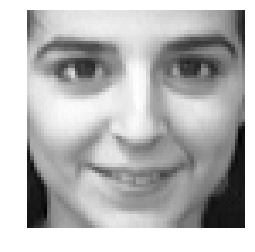

glasses: 0


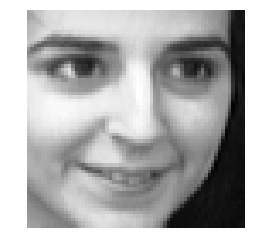

glasses: 0


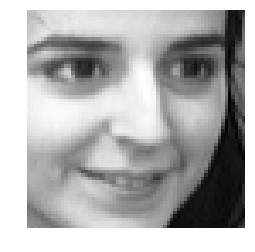

glasses: 0


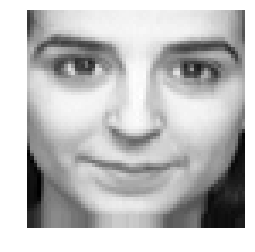

glasses: 0


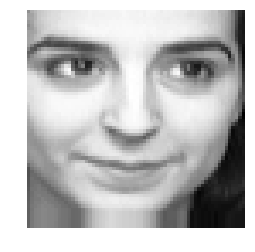

glasses: 0


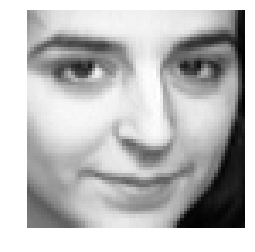

glasses: 0


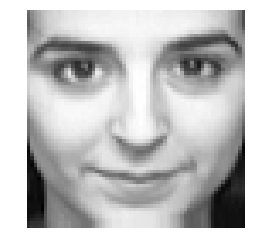

glasses: 0


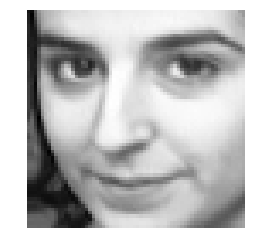

glasses: 0


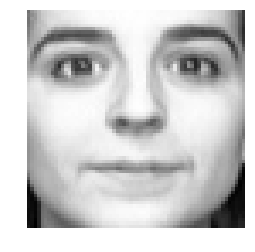

glasses: 0


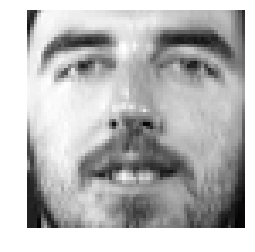

glasses: 0


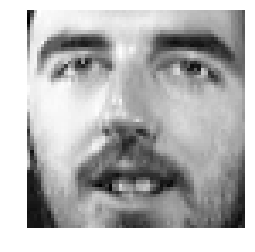

glasses: 0


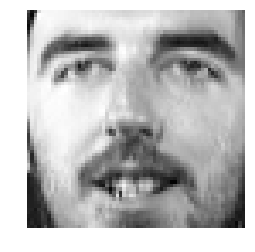

glasses: 0


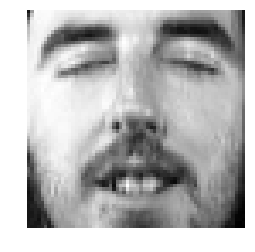

glasses: 0


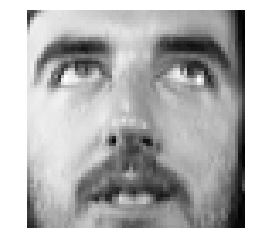

glasses: 0


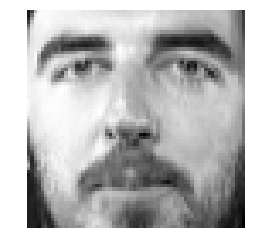

glasses: 0


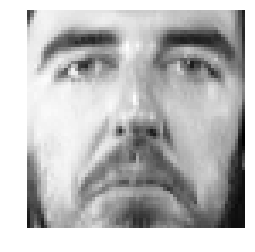

glasses: 0


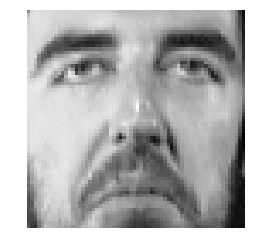

glasses: 0


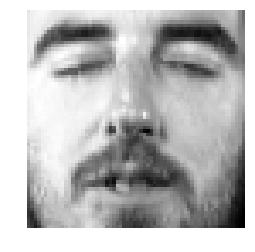

glasses: 0


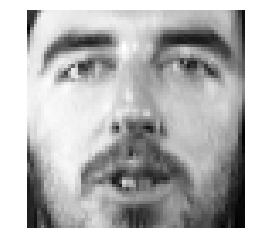

glasses: 0


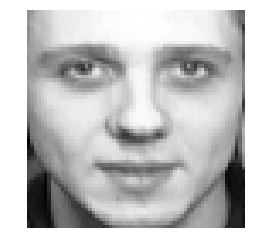

glasses: 0


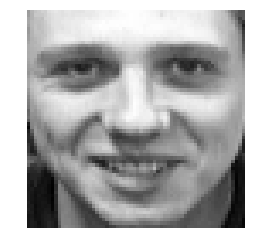

glasses: 0


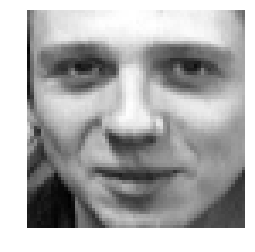

glasses: 0


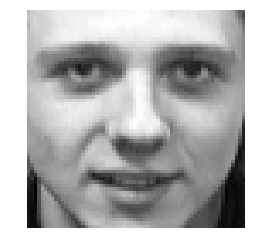

glasses: 0


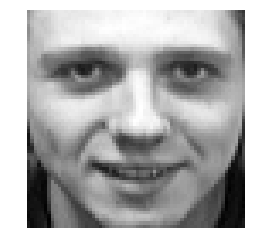

glasses: 0


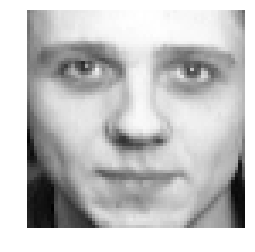

glasses: 0


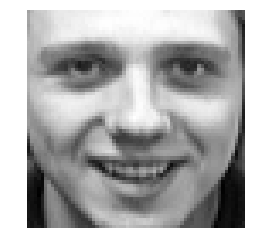

glasses: 0


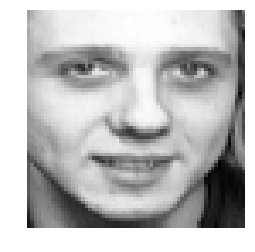

glasses: 0


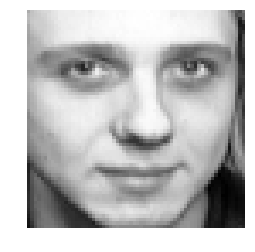

glasses: 0


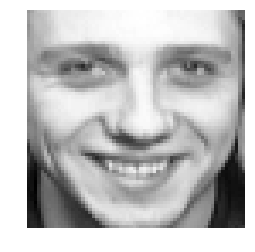

glasses: 0


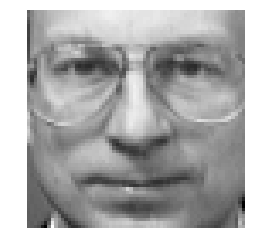

glasses: 1


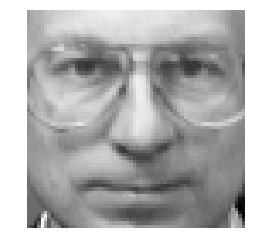

glasses: 1


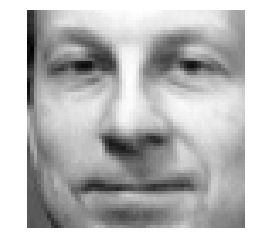

glasses: 0


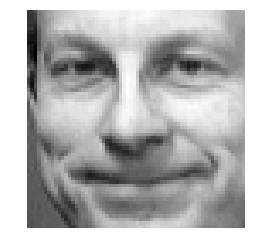

glasses: 0


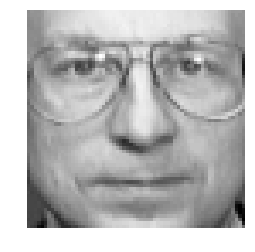

glasses: 1


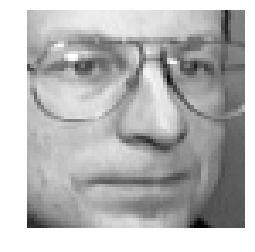

glasses: 1


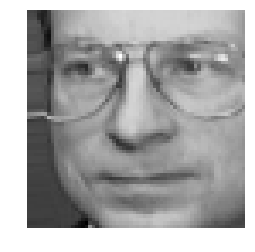

glasses: 1


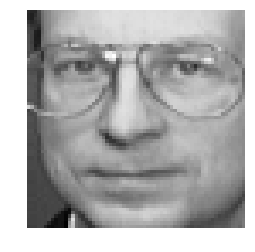

glasses: 1


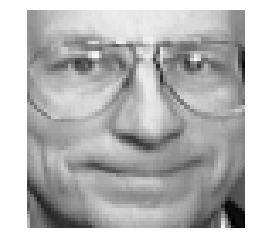

glasses: 1


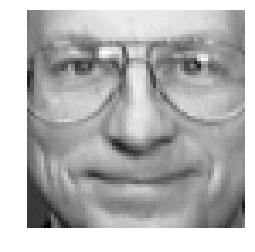

glasses: 1


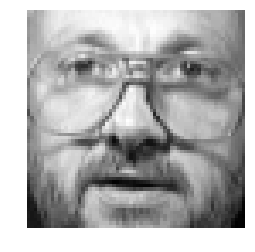

glasses: 1


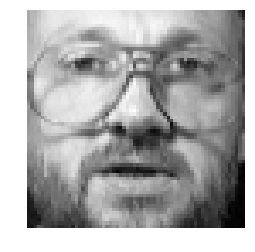

glasses: 1


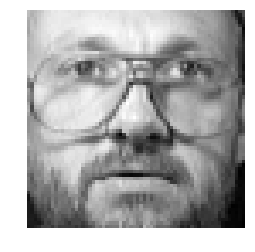

glasses: 1


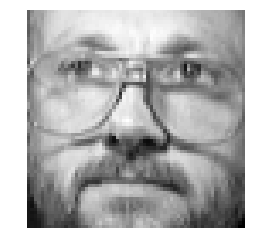

glasses: 1


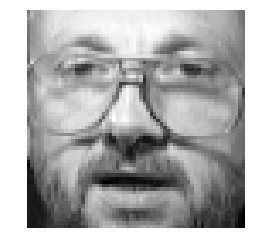

glasses: 1


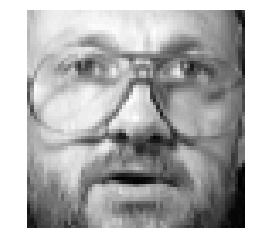

glasses: 1


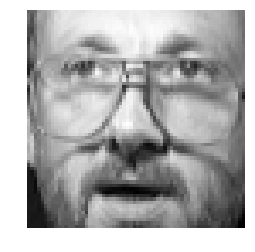

glasses: 1


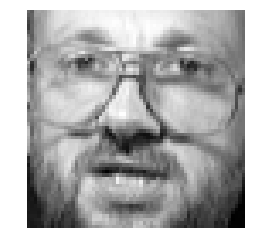

glasses: 1


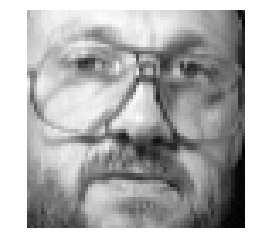

glasses: 1


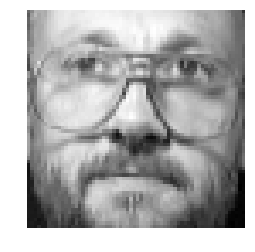

glasses: 1


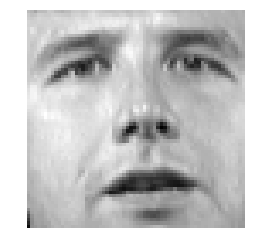

glasses: 0


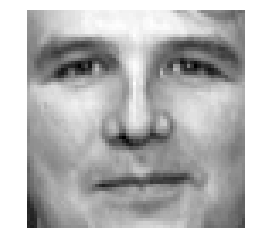

glasses: 0


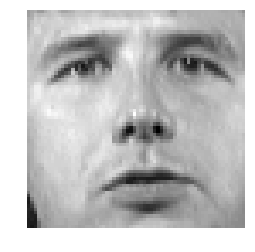

glasses: 0


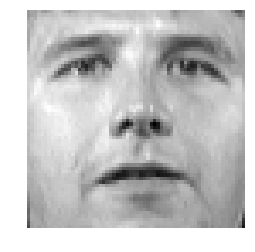

glasses: 0


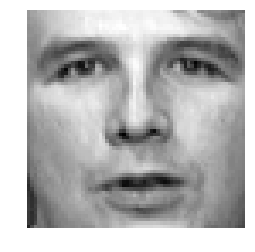

glasses: 0


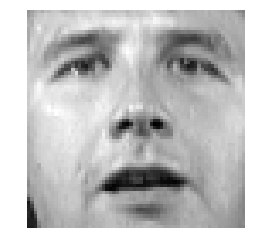

glasses: 0


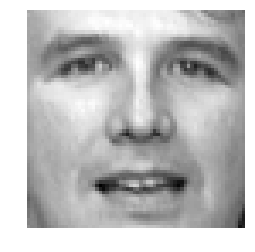

glasses: 0


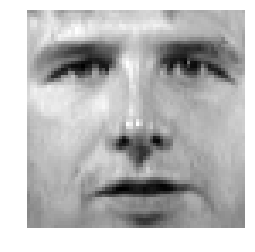

glasses: 0


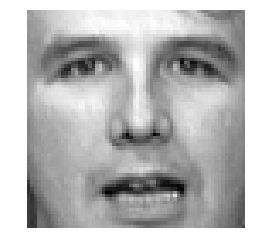

glasses: 0


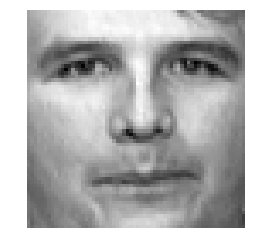

glasses: 0


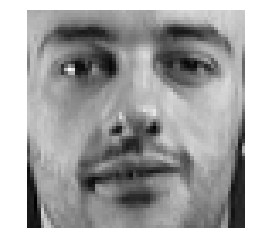

glasses: 0


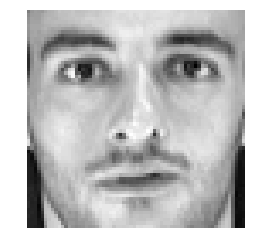

glasses: 0


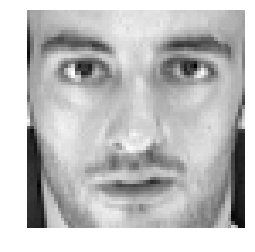

glasses: 0


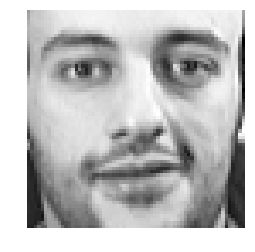

glasses: 0


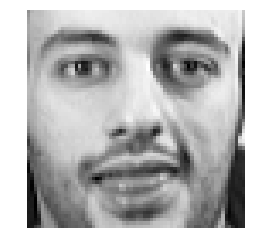

glasses: 0


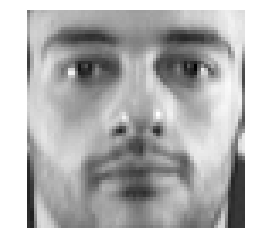

glasses: 0


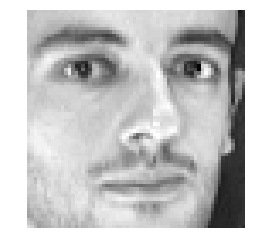

glasses: 0


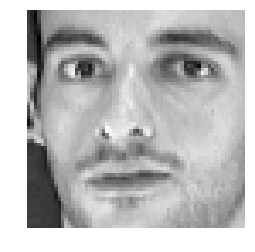

glasses: 0


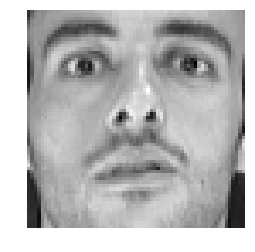

glasses: 0


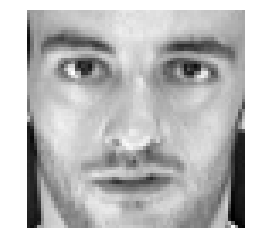

glasses: 0


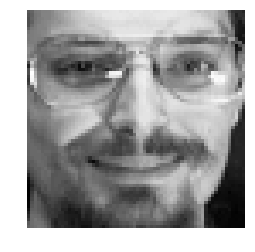

glasses: 1


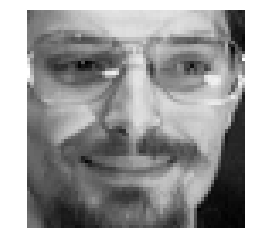

glasses: 1


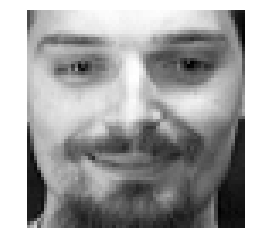

glasses: 0


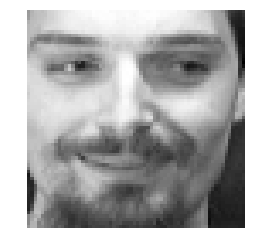

glasses: 0


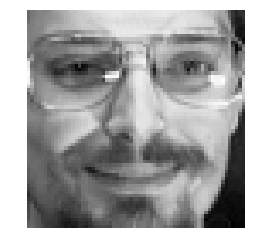

glasses: 1


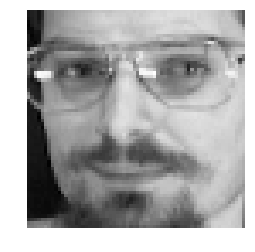

glasses: 1


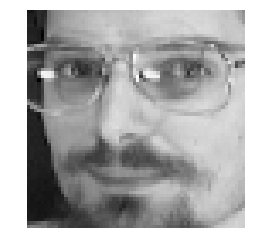

glasses: 1


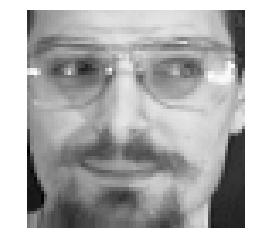

glasses: 1


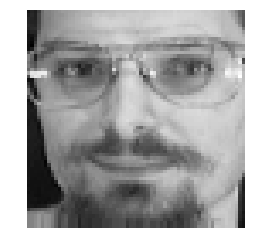

glasses: 1


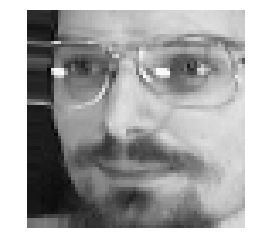

glasses: 1


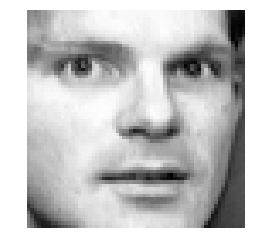

glasses: 0


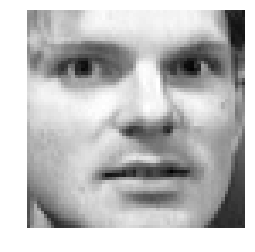

glasses: 0


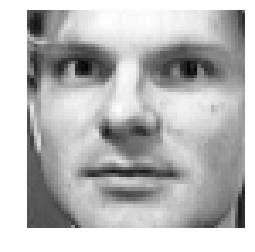

glasses: 0


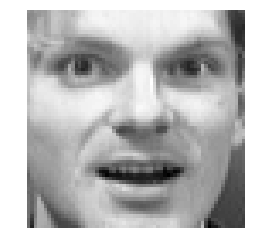

glasses: 0


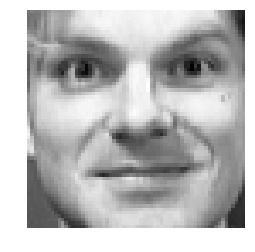

glasses: 0


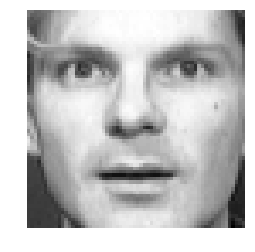

glasses: 0


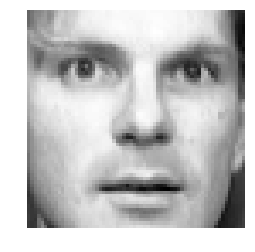

glasses: 0


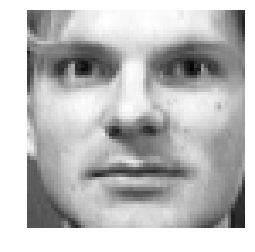

glasses: 0


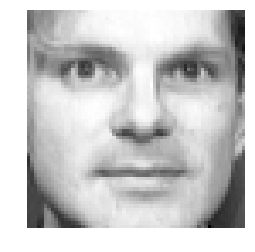

glasses: 0


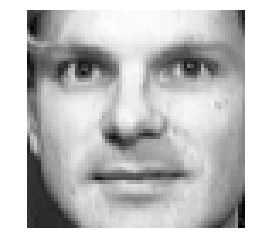

glasses: 0


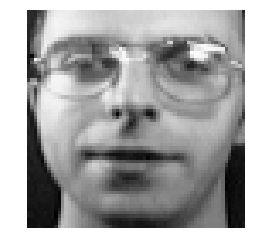

glasses: 1


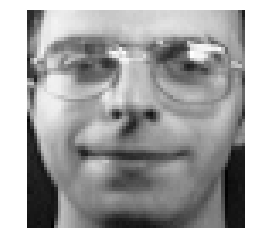

glasses: 1


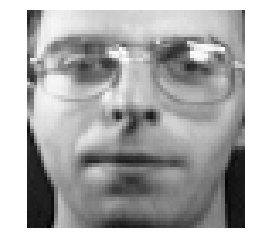

glasses: 1


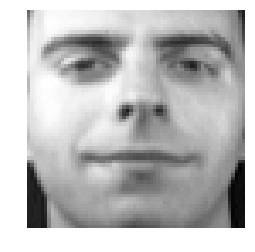

glasses: 0


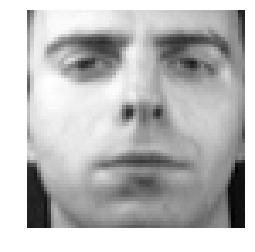

glasses: 0


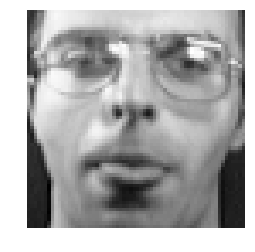

glasses: 1


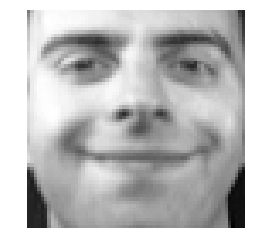

glasses: 0


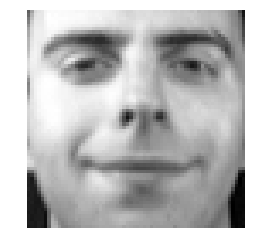

glasses: 0


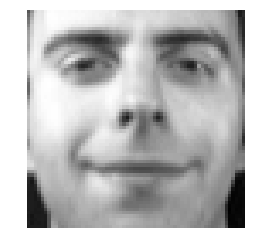

glasses: 0


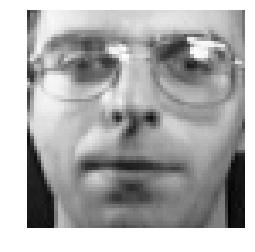

glasses: 1


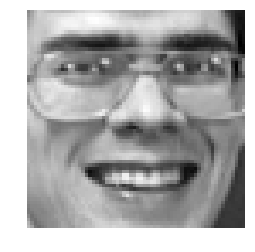

glasses: 1


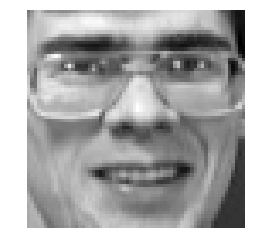

glasses: 1


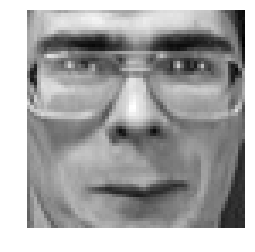

glasses: 1


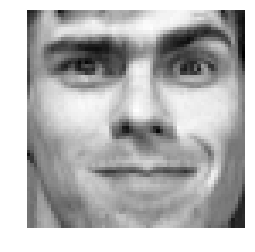

glasses: 0


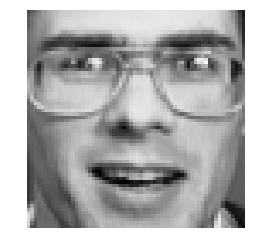

glasses: 1


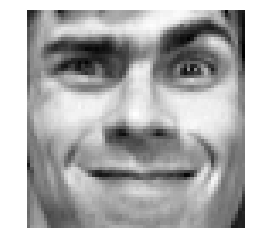

glasses: 0


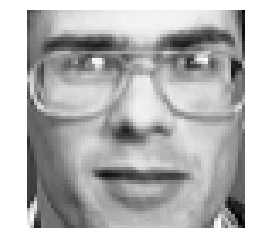

glasses: 1


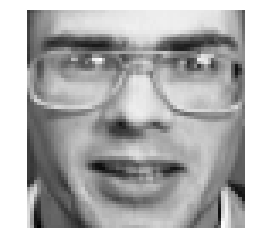

glasses: 1


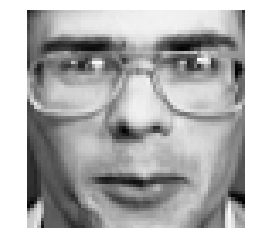

glasses: 1


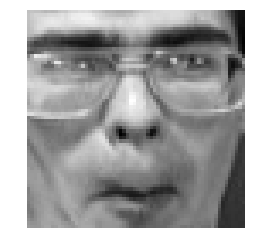

glasses: 1


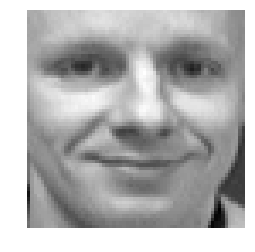

glasses: 0


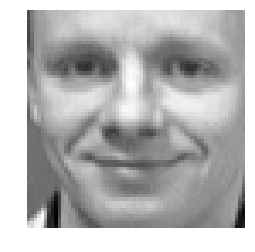

glasses: 0


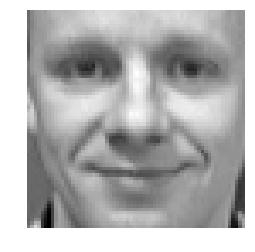

glasses: 0


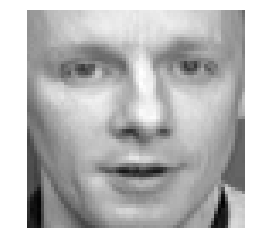

glasses: 0


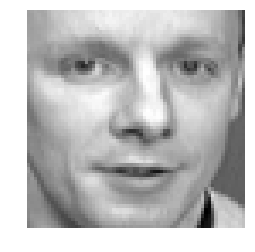

glasses: 0


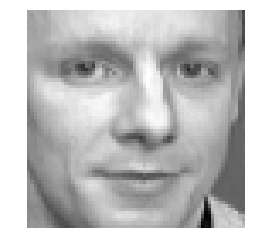

glasses: 0


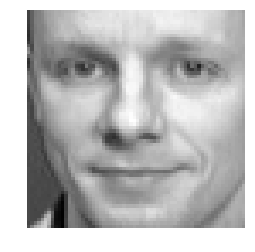

glasses: 0


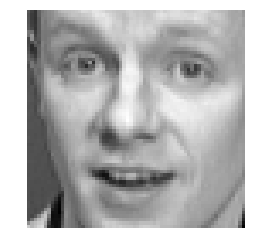

glasses: 0


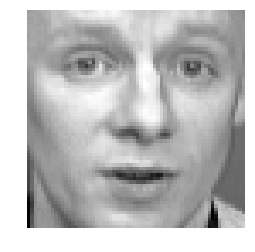

glasses: 0


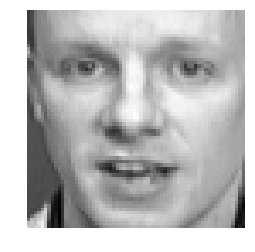

glasses: 0


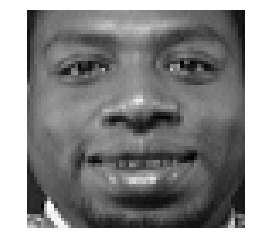

glasses: 0


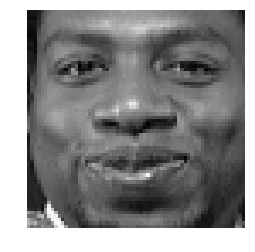

glasses: 0


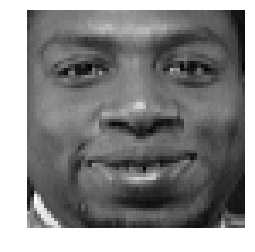

glasses: 0


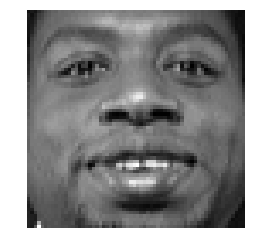

glasses: 0


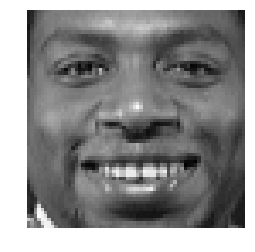

glasses: 0


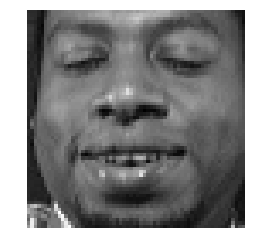

glasses: 0


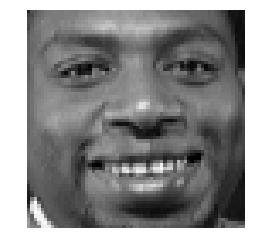

glasses: 0


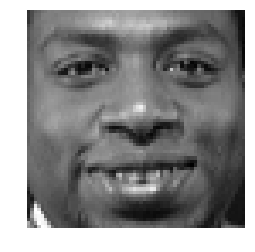

glasses: 0


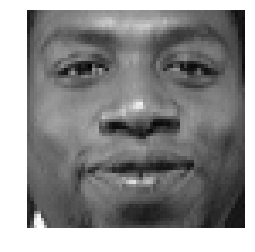

glasses: 0


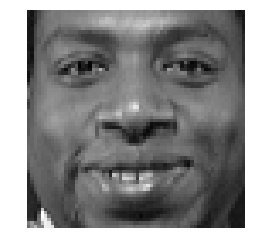

glasses: 0


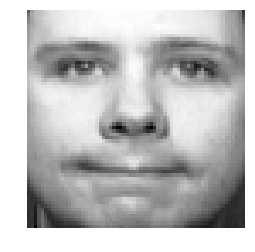

glasses: 0


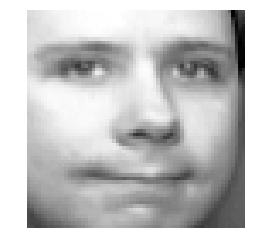

glasses: 0


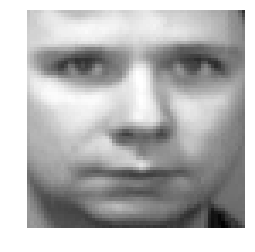

glasses: 0


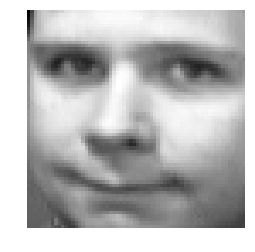

glasses: 0


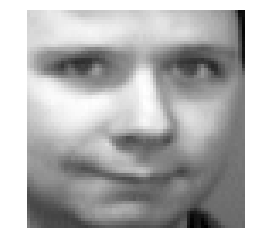

glasses: 0


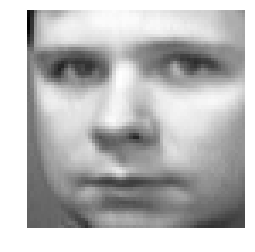

glasses: 0


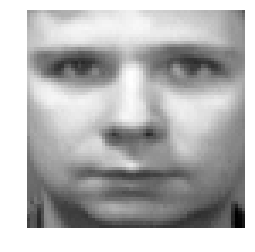

glasses: 0


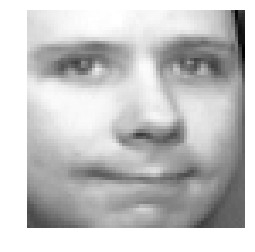

glasses: 0


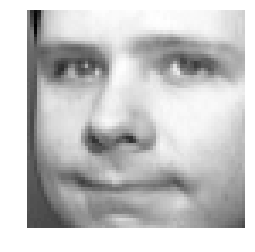

glasses: 0


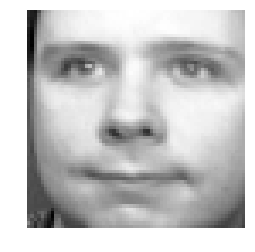

glasses: 0


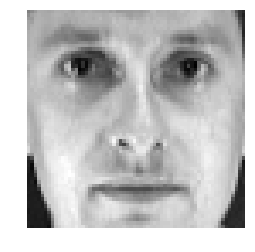

glasses: 0


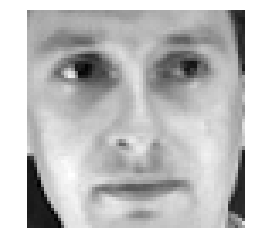

glasses: 0


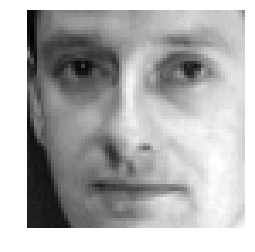

glasses: 0


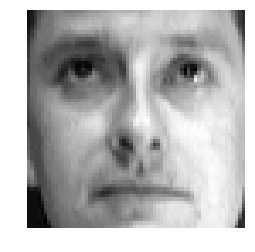

glasses: 0


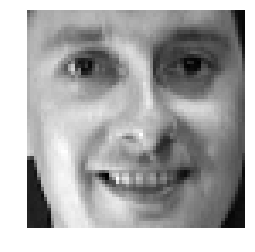

glasses: 0


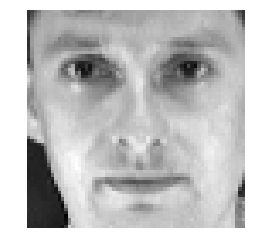

glasses: 0


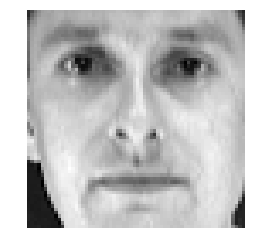

glasses: 0


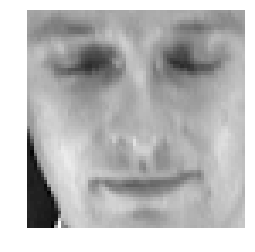

glasses: 0


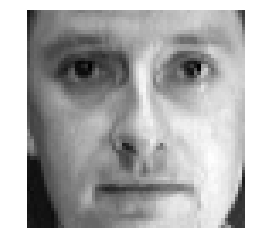

glasses: 0


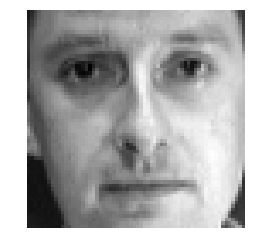

glasses: 0


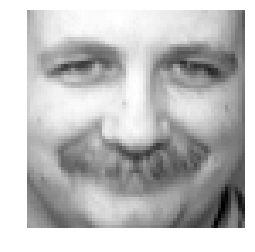

glasses: 0


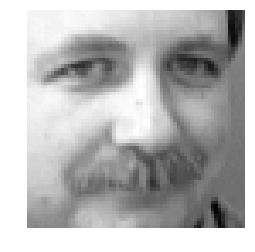

glasses: 0


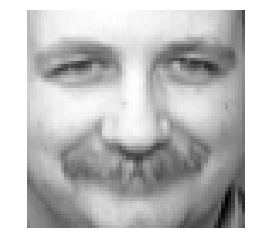

glasses: 0


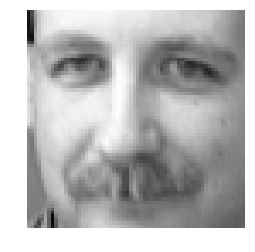

glasses: 0


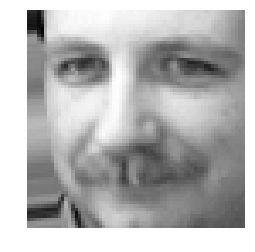

glasses: 0


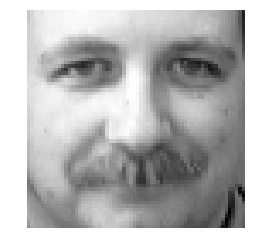

glasses: 0


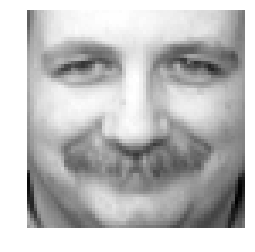

glasses: 0


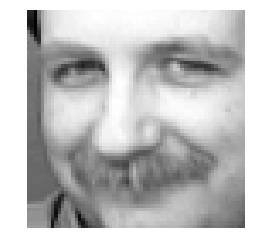

glasses: 0


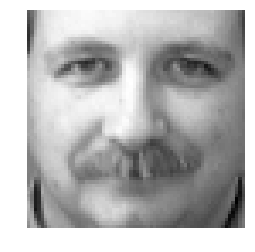

glasses: 0


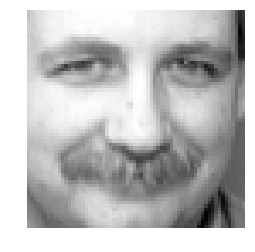

glasses: 0


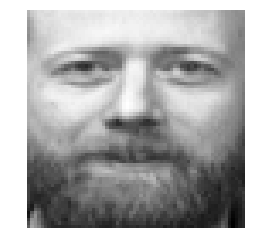

glasses: 0


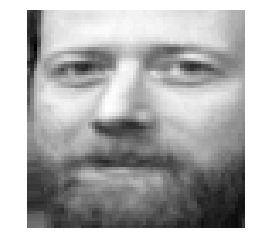

glasses: 0


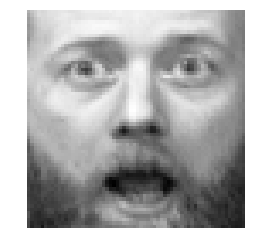

glasses: 0


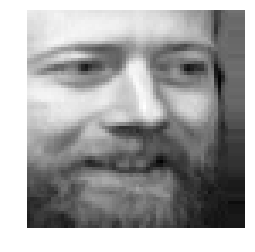

glasses: 0


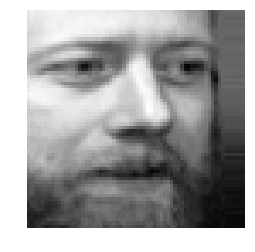

glasses: 0


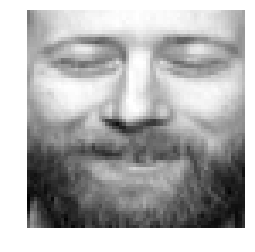

glasses: 0


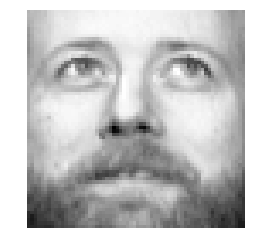

glasses: 0


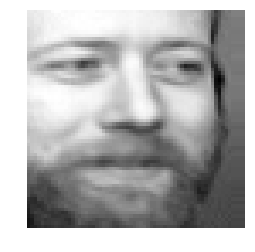

glasses: 0


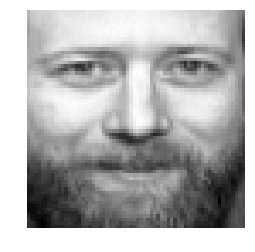

glasses: 0


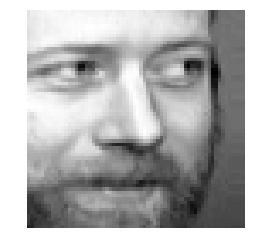

glasses: 0


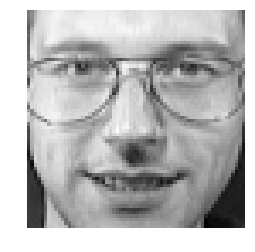

glasses: 1


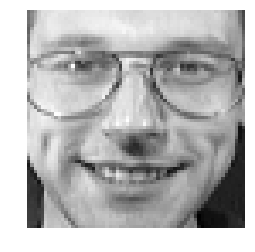

glasses: 1


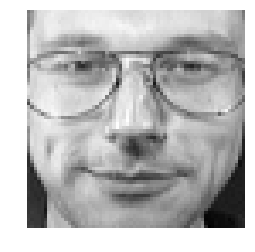

glasses: 1


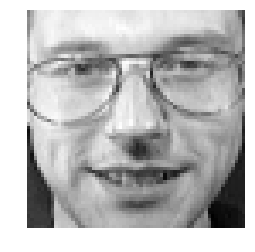

glasses: 1


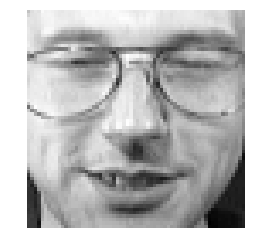

glasses: 1


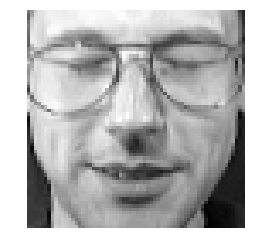

glasses: 1


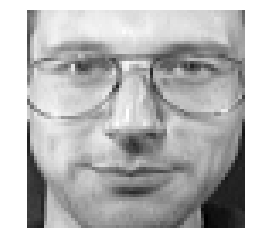

glasses: 1


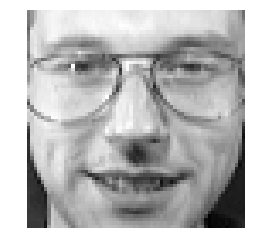

glasses: 1


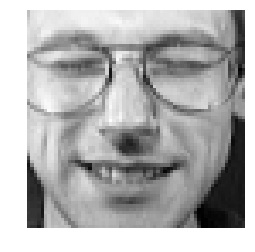

glasses: 1


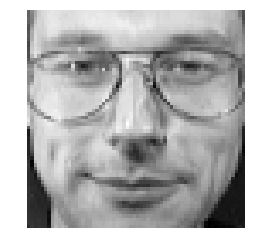

glasses: 1


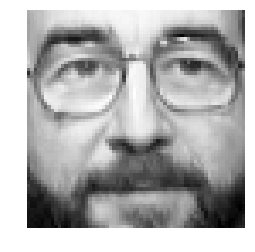

glasses: 1


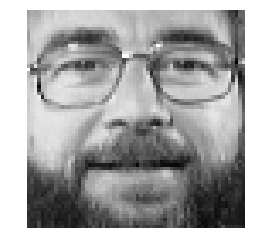

glasses: 1


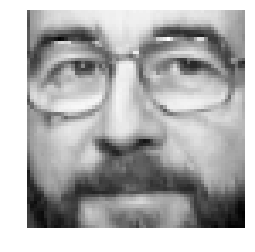

glasses: 1


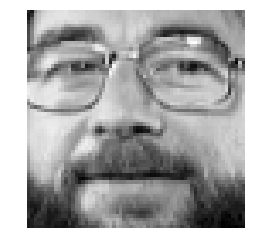

glasses: 1


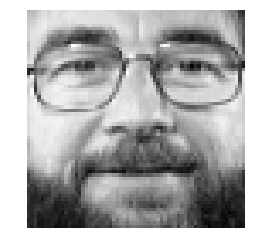

glasses: 1


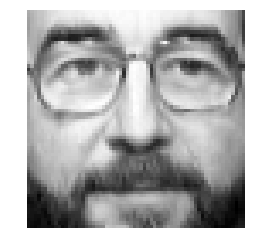

glasses: 1


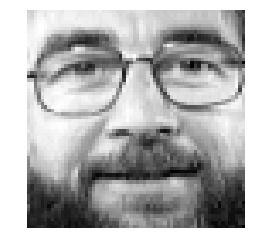

glasses: 1


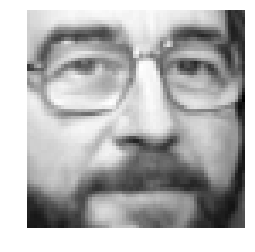

glasses: 1


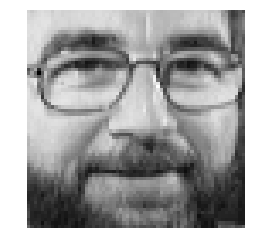

glasses: 1


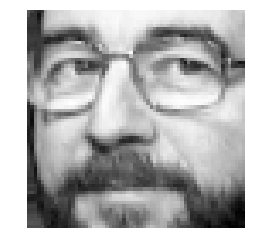

glasses: 1


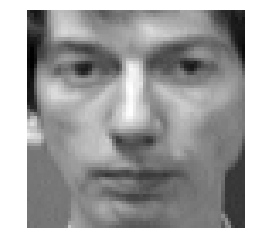

glasses: 0


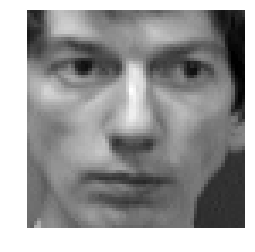

glasses: 0


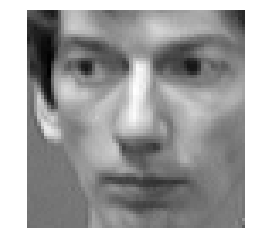

glasses: 0


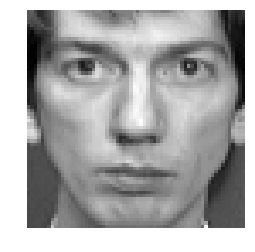

glasses: 0


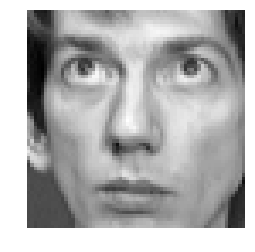

glasses: 0


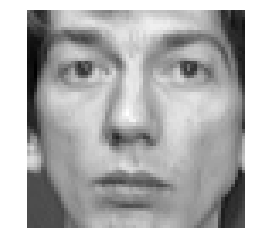

glasses: 0


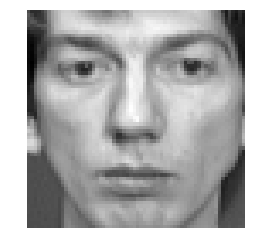

glasses: 0


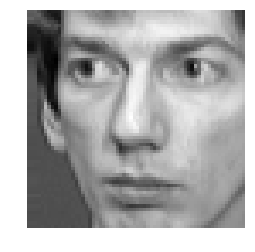

glasses: 0


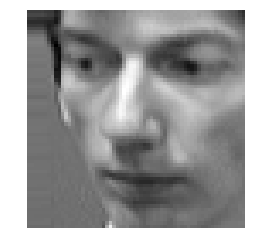

glasses: 0


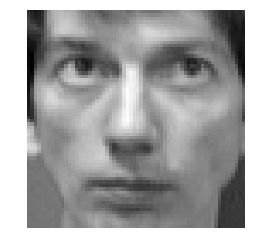

glasses: 0


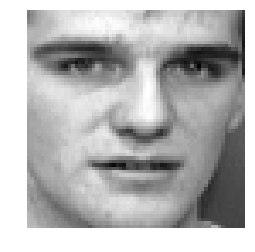

glasses: 0


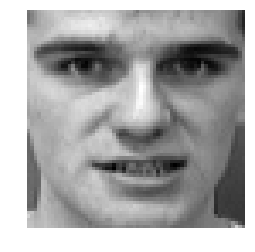

glasses: 0


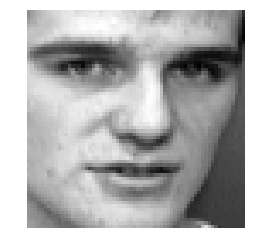

glasses: 0


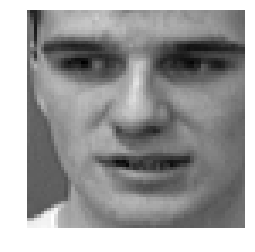

glasses: 0


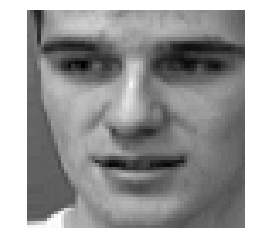

glasses: 0


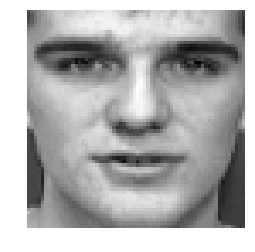

glasses: 0


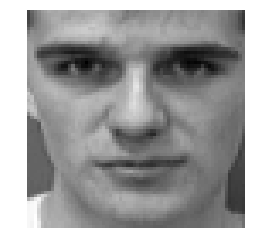

glasses: 0


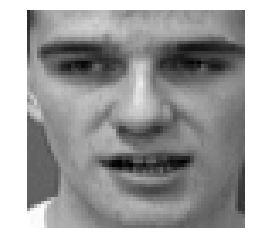

glasses: 0


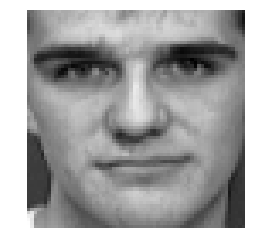

glasses: 0


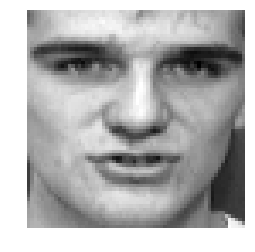

glasses: 0


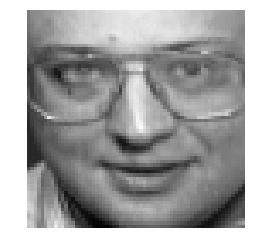

glasses: 1


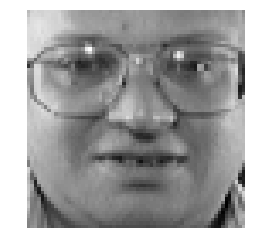

glasses: 1


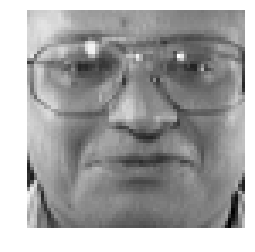

glasses: 1


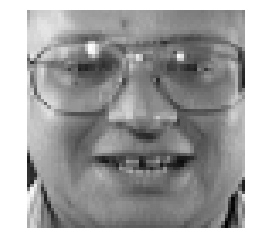

glasses: 1


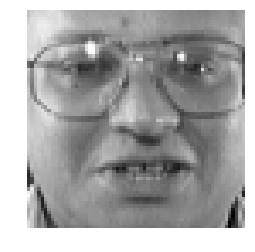

glasses: 1


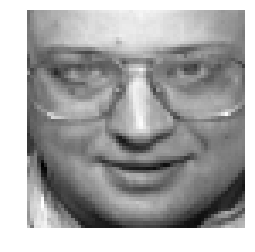

glasses: 1


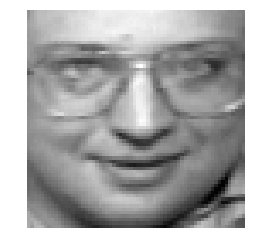

glasses: 1


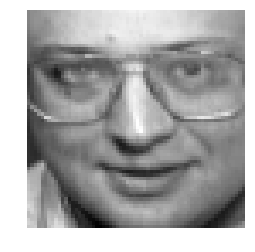

glasses: 1


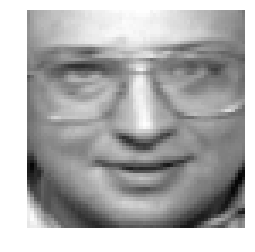

glasses: 1


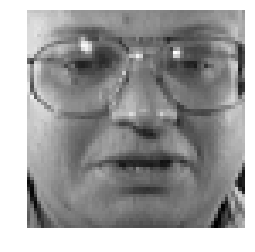

glasses: 1


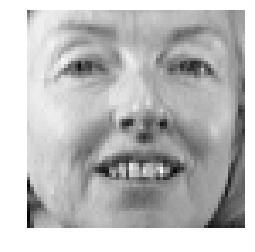

glasses: 0


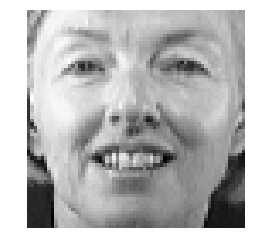

glasses: 0


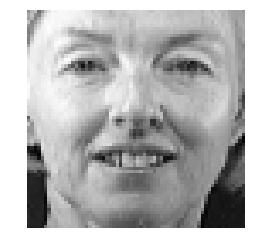

glasses: 0


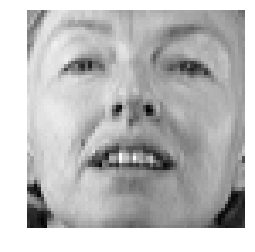

glasses: 0


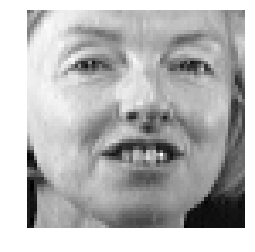

glasses: 0


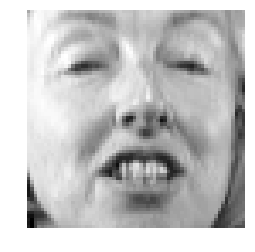

glasses: 0


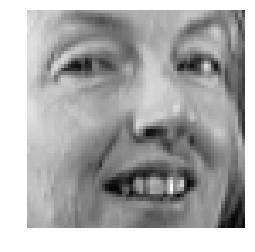

glasses: 0


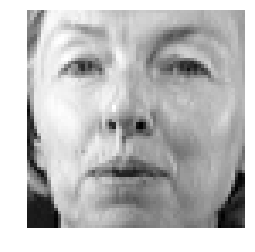

glasses: 0


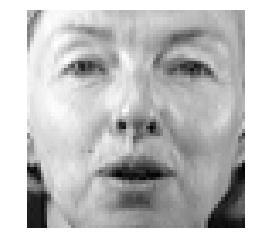

glasses: 0


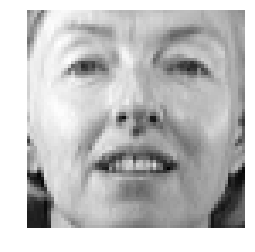

glasses: 0


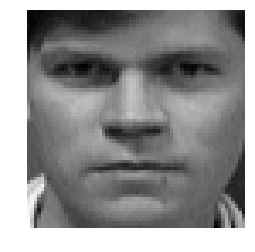

glasses: 0


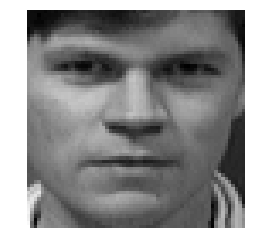

glasses: 0


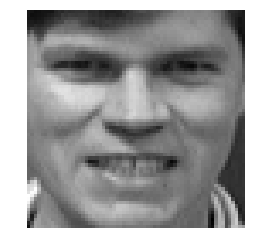

glasses: 0


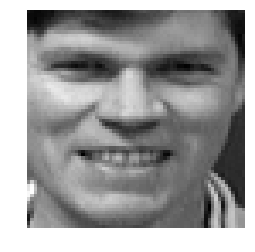

glasses: 0


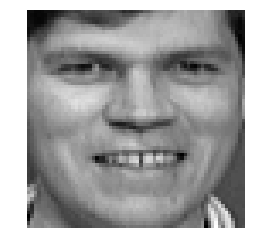

glasses: 0


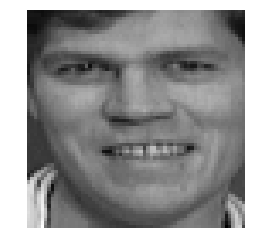

glasses: 0


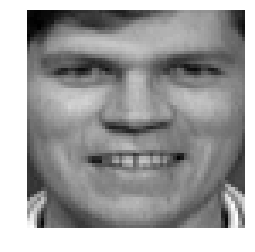

glasses: 0


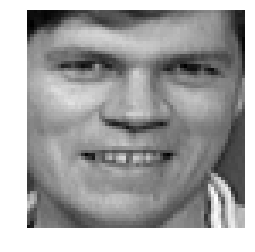

glasses: 0


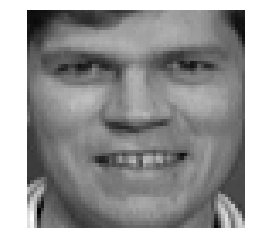

glasses: 0


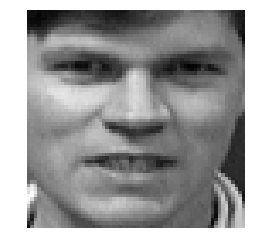

glasses: 0


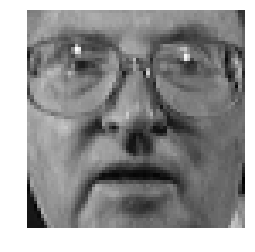

glasses: 1


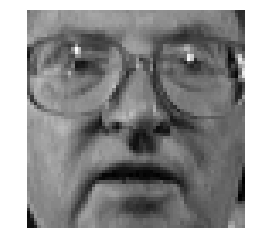

glasses: 1


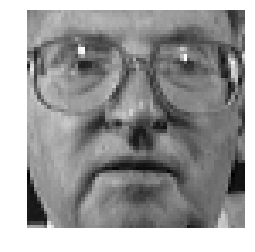

glasses: 1


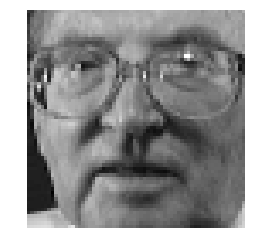

glasses: 1


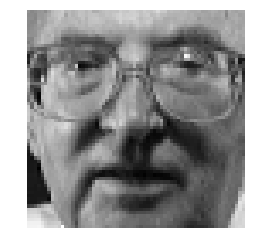

glasses: 1


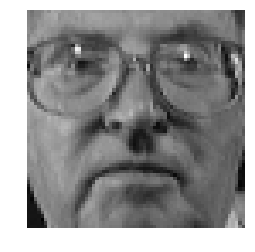

glasses: 1


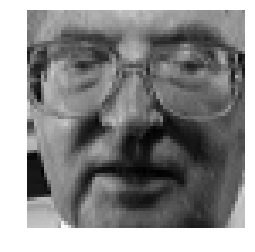

glasses: 1


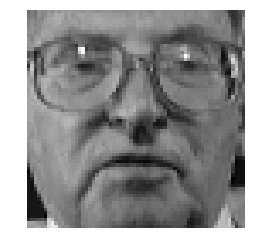

glasses: 1


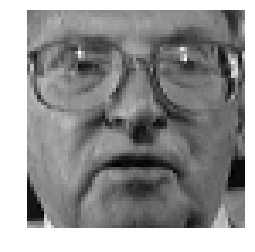

glasses: 1


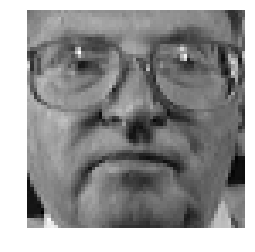

glasses: 1


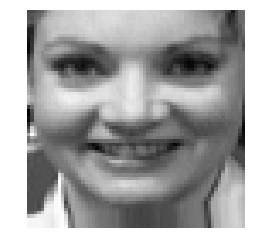

glasses: 0


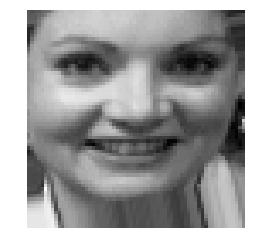

glasses: 0


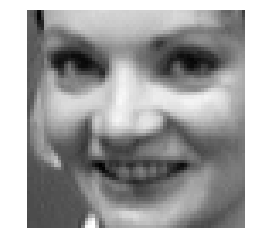

glasses: 0


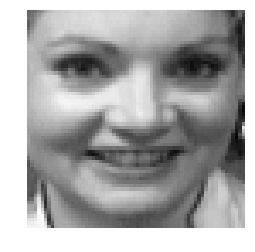

glasses: 0


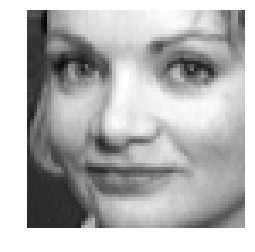

glasses: 0


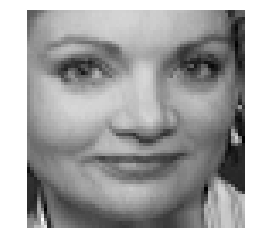

glasses: 0


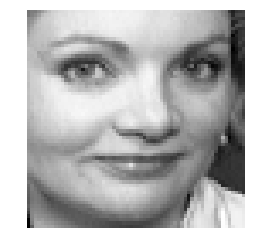

glasses: 0


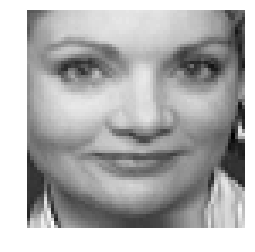

glasses: 0


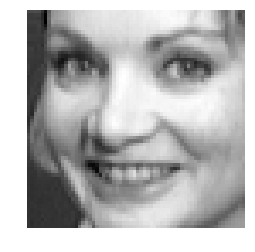

glasses: 0


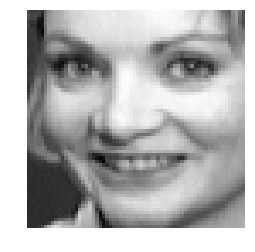

glasses: 0


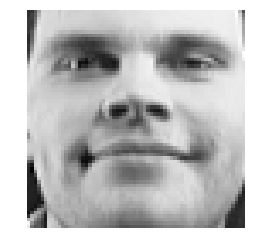

glasses: 0


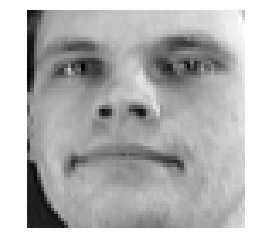

glasses: 0


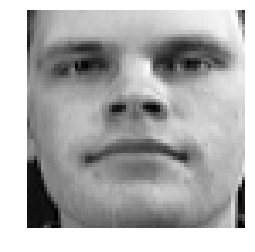

glasses: 0


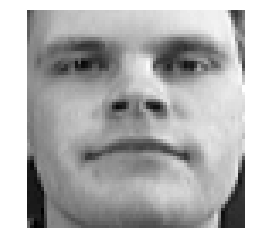

glasses: 0


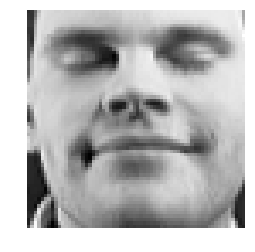

glasses: 0


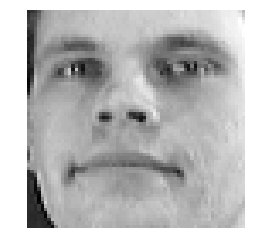

glasses: 0


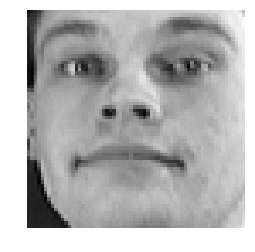

glasses: 0


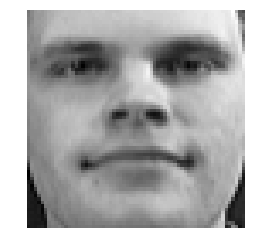

glasses: 0


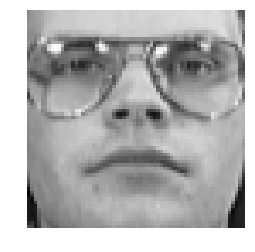

glasses: 1


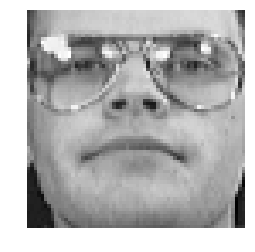

glasses: 1


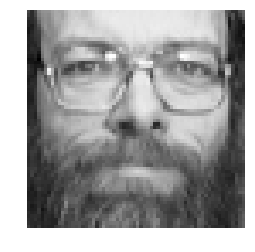

glasses: 1


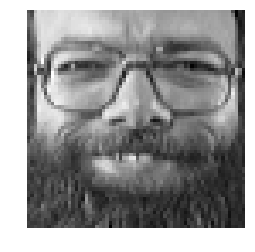

glasses: 1


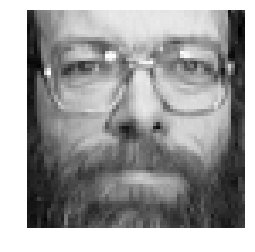

glasses: 1


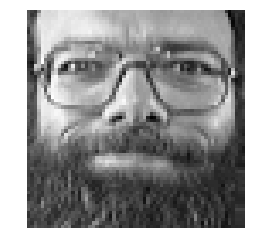

glasses: 1


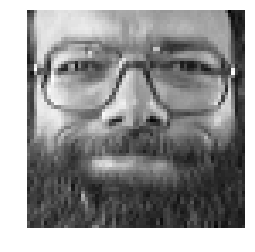

glasses: 1


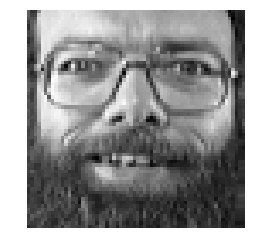

glasses: 1


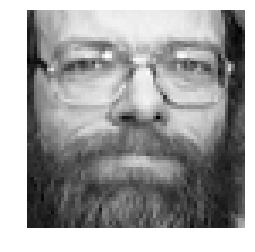

glasses: 1


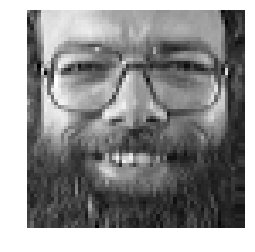

glasses: 1


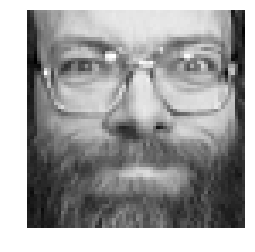

glasses: 1


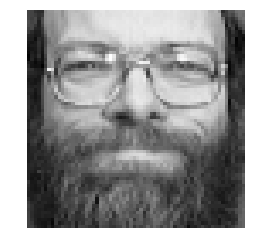

glasses: 1


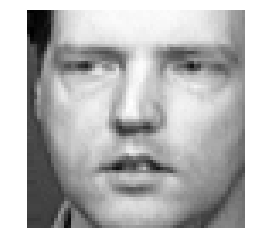

glasses: 0


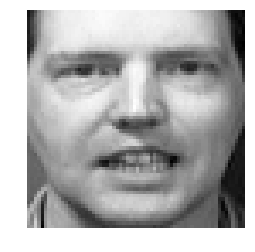

glasses: 0


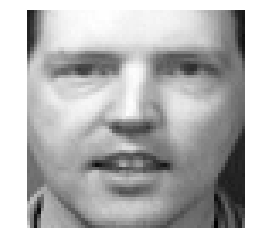

glasses: 0


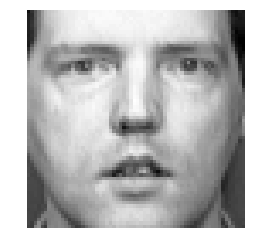

glasses: 0


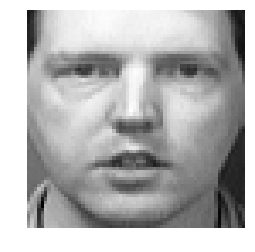

glasses: 0


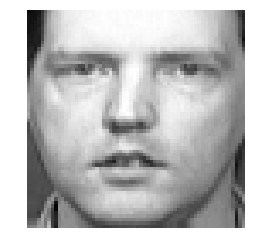

glasses: 0


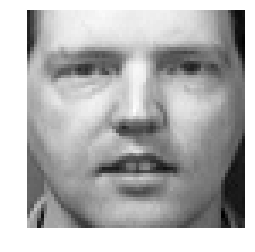

glasses: 0


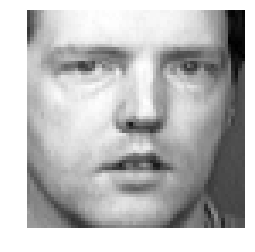

glasses: 0


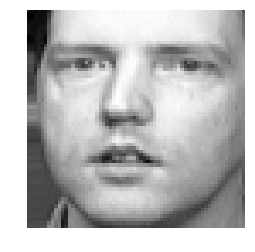

glasses: 0


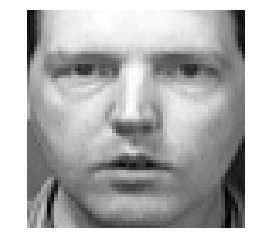

glasses: 0


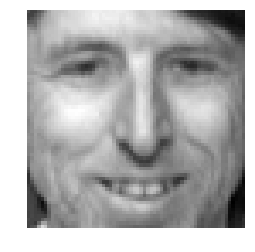

glasses: 0


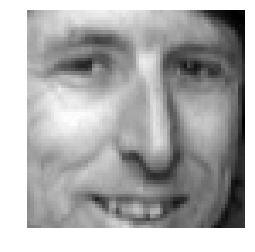

glasses: 0


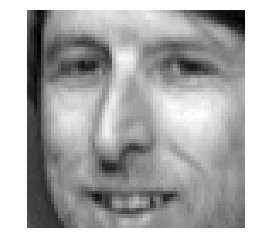

glasses: 0


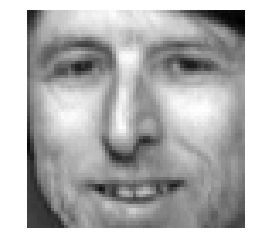

glasses: 0


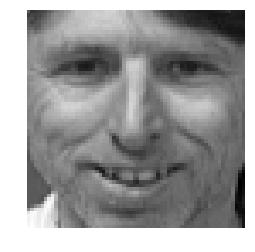

glasses: 0


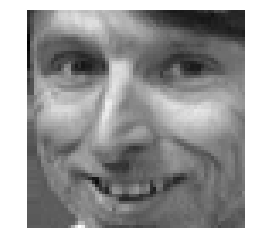

glasses: 0


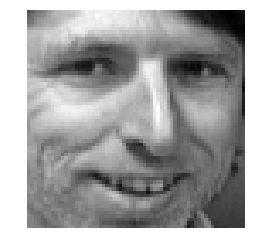

glasses: 0


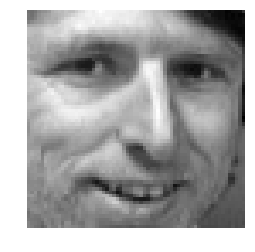

glasses: 0


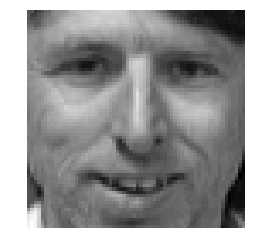

glasses: 0


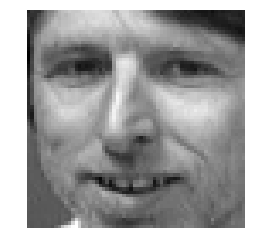

glasses: 0


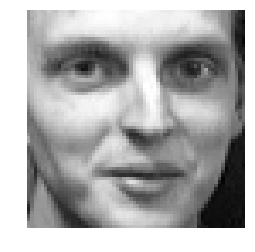

glasses: 0


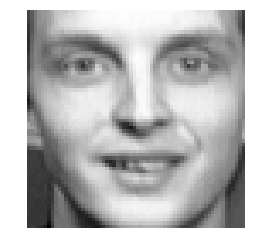

glasses: 0


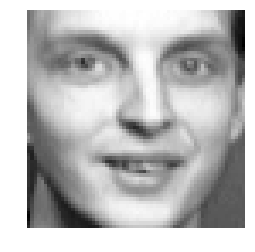

glasses: 0


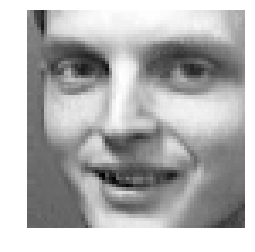

glasses: 0


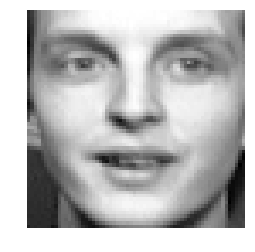

glasses: 0


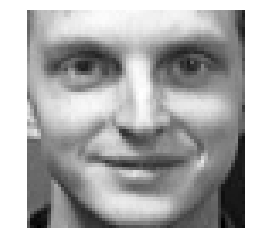

glasses: 0


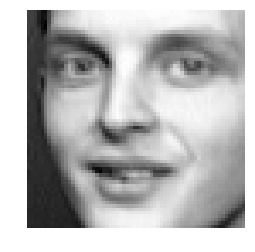

glasses: 0


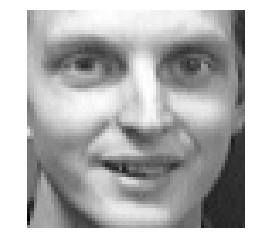

glasses: 0


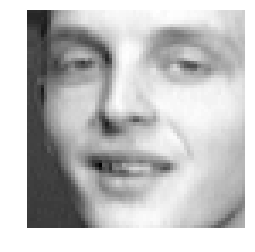

glasses: 0


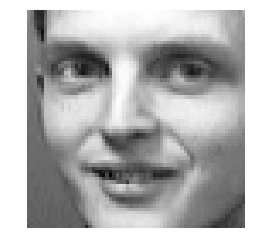

glasses: 0


In [52]:
for i in range(num_images): 
    plt.axis("off")
    plt.imshow(data.images[i], cmap='gray');
    plt.show()                             
    glasses.append(input('glasses: '))     # wait for input from the user
    plt.close()

In [68]:
len(glasses)

400

In [69]:
glasses = list(map(int, glasses))

In [71]:
np.savetxt('glasses.txt', glasses, fmt='%.1f', delimiter=',')

### Setting Up the CNN